In [26]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [27]:
!pip install scikit-learn==1.3.0

In [28]:
df = pd.read_csv ('Iris.csv')
df.head ()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df = df.drop (columns = ['Id'])
df.head ()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.describe ()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
df['Species'].value_counts ()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
df.isnull().sum().sum()

0

<Axes: >

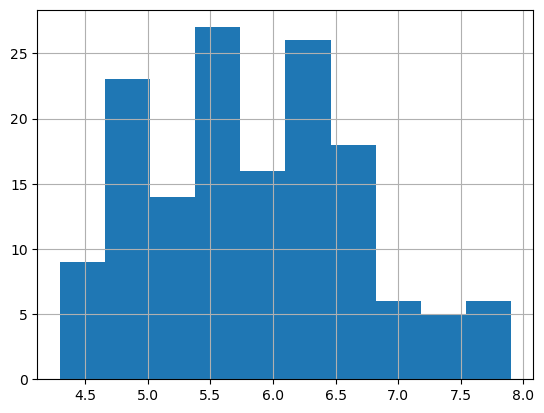

In [34]:
df ['SepalLengthCm'].hist ()

<Axes: >

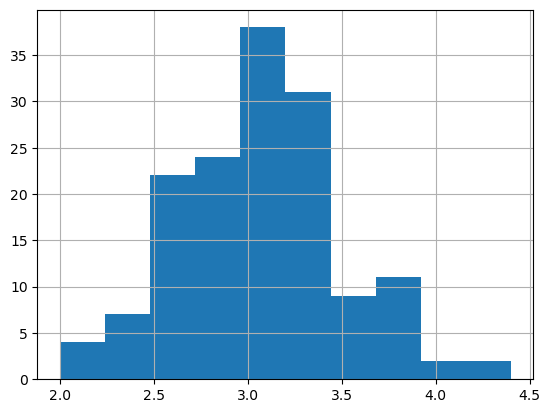

In [35]:
df ['SepalWidthCm'].hist ()

<Axes: >

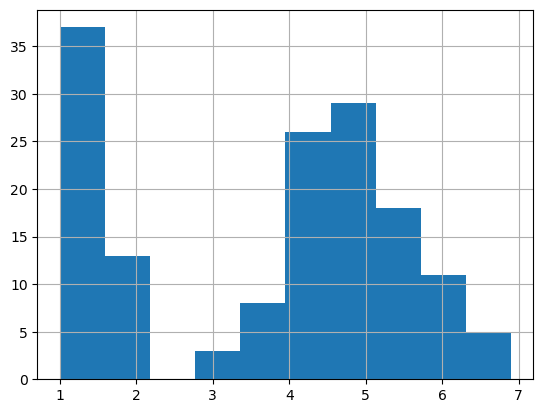

In [36]:
df ['PetalLengthCm'].hist ()

<Axes: >

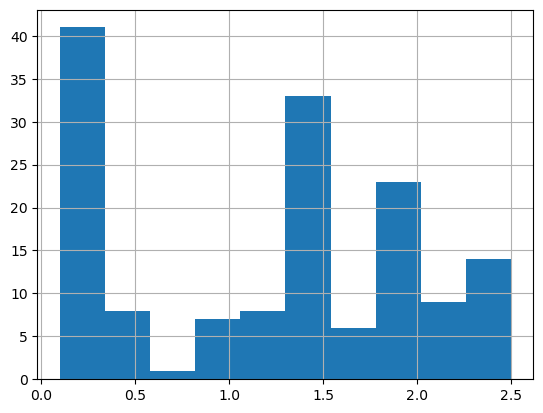

In [37]:
df ['PetalWidthCm'].hist ()

In [38]:
colors = ['Yellow', 'Blue', 'Red']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

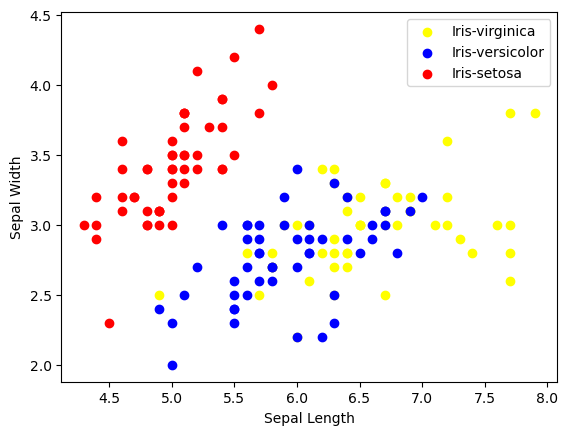

In [44]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    
plt.xlabel ('Sepal Length')
plt.ylabel ('Sepal Width')
plt.legend ()

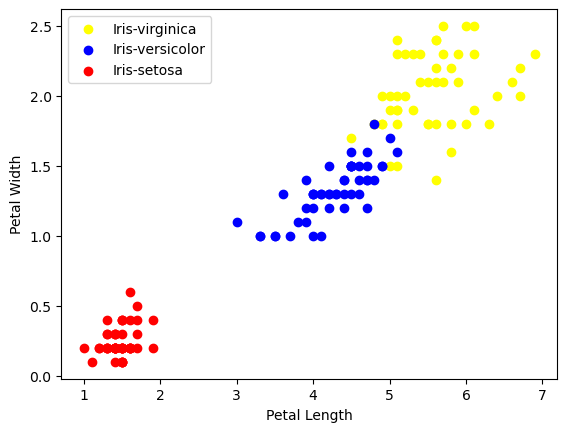

In [45]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    
plt.xlabel ('Petal Length')
plt.ylabel ('Petal Width')
plt.legend ()

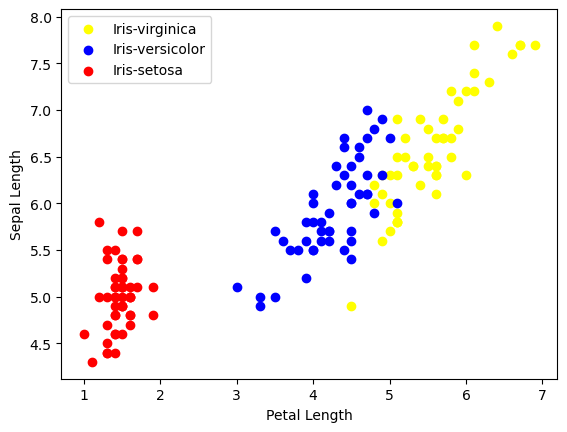

In [46]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['PetalLengthCm'], x['SepalLengthCm'], c = colors[i], label=species[i])
    
plt.xlabel ('Petal Length')
plt.ylabel ('Sepal Length')
plt.legend ()

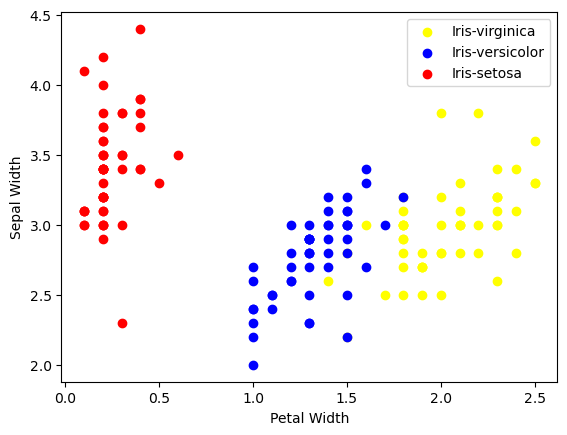

In [47]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['PetalWidthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    
plt.xlabel ('Petal Width')
plt.ylabel ('Sepal Width')
plt.legend ()

In [48]:
df.corr ()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

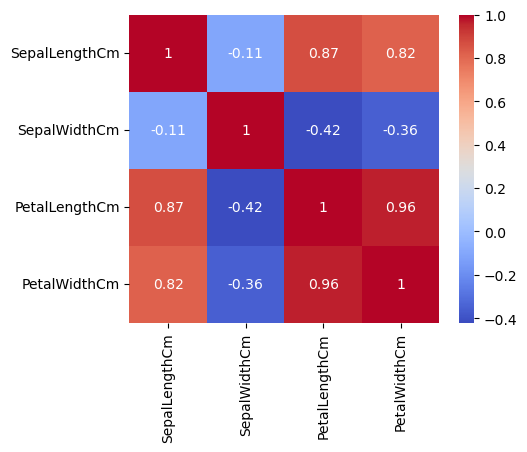

In [49]:
corr = df.corr ()
fig, ax = plt.subplots (figsize=(5,4))
sns.heatmap (corr, annot=True, ax=ax, cmap = 'coolwarm')

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

X = df.drop (columns=['Species'])
Y = df ['Species']

x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.30)

In [51]:
model = LogisticRegression ()
model.fit (x_train, y_train)
print ("Logistic Regression Accuracy: ", model.score (x_test, y_test) * 100)

Logistic Regression Accuracy:  95.55555555555556


In [53]:
model = KNeighborsClassifier ()
model.fit (x_train.values, y_train.values)
print ("K-Nearest Neighbors Accuracy: ", model.score (x_test, y_test) * 100)

K-Nearest Neighbors Accuracy:  93.33333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model 

In [82]:
import joblib

filename = 'IrisClassifier.pkl'
%notebook "E:\Shreya\MIT\Bharat Intern/IrisClassifier.pkl"
joblib.dump (model, open ('IrisClassifier', 'wb'))

try:
    joblib.dump(model, filename)
    print('Model saved successfully')
except Exception as e:
    print(f'Error saving model: {e}')


Model saved successfully


In [83]:
load_model = joblib.load (open('IrisClassifier', 'rb'))

In [84]:
load_model.predict ([[5.5, 3, 5, 1.0]])

array(['Iris-versicolor'], dtype=object)